I used this notebook early on to investigate the data and try to figure out why I was running out of memory in my training loop.

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Lang Gen Project/LegalBert Parentheticals Cross Reference Datasets/train_dataset.csv'

# Read the CSV file
df = pd.read_csv(file_path)

NameError: ignored

In [1]:
df = df.dropna()
# This is makes sure to remove a small set of human-annotated reference cases from train if they are there.
case_ids_to_remove = [
    8581821, 4399046, 1202523, 9958144, 8315794, 8558219, 8309170, 314558,
    1788870, 2332888, 2837624, 492660, 10415553, 7157160, 374874, 2617136
]

df = df[~df['case_id'].isin(case_ids_to_remove)]

cleaned_file_path = '/content/drive/MyDrive/Lang Gen Project/LegalBert Parentheticals Cross Reference Datasets/cleaned_val_dataset.csv'
df.to_csv(cleaned_file_path, index=False)

NameError: ignored

In [ ]:
!pip install transformers

In [ ]:
file_path = '/content/drive/MyDrive/Lang Gen Project/LegalBert Parentheticals Cross Reference Datasets/cleaned_train_dataset.csv'

df = pd.read_csv('/content/test_set_for_jesse_clean.csv')

In [ ]:
# Don't use a tokenizer, just do word count
texts = df['input']
word_counts = [len(text.split()) for text in texts]


In [ ]:
texts[2]

'We granted certiorari in this case, Hummel v. Gainesville Radiology Group, P.C., 205 Ga. App. The record of the voir dire examination reveals that juror Griffin, an 82-year-old man, failed to respond to the inquiry. In opposition to her motion and as permitted by OCGA § 9-10-9, Gainesville Radiology submitted the affidavits of juror Griffin, another juror, and the jury foreman. Nevertheless, Hummel did not request his individual examination. Following the jury’s defense verdict, Hummel’s counsel learned that juror Griffin’s wife had died in 1942 of cancer of the liver and breast. The Court of Appeals reversed, holding that the juror’s silence, which the court regarded as tantamount to giving an untruthful answer, could not be construed as harmless error, relying on Martin v. State, 168 Ga. App. The trial court denied the motion. Co., supra (denial of motion for mistrial reversed where juror failed to respond that she was being represented by plaintiffs counsel in a minor matter even t

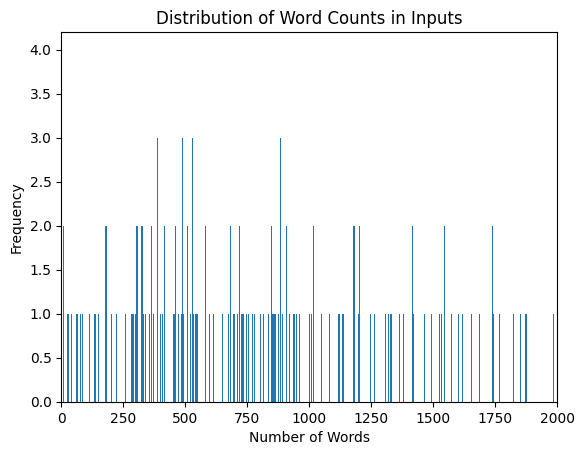

In [ ]:
import matplotlib.pyplot as plt

plt.hist(word_counts, bins=range(min(word_counts), max(word_counts) + 1, 1))
plt.title('Distribution of Word Counts in Inputs')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.xlim(0, 2000)
plt.show()

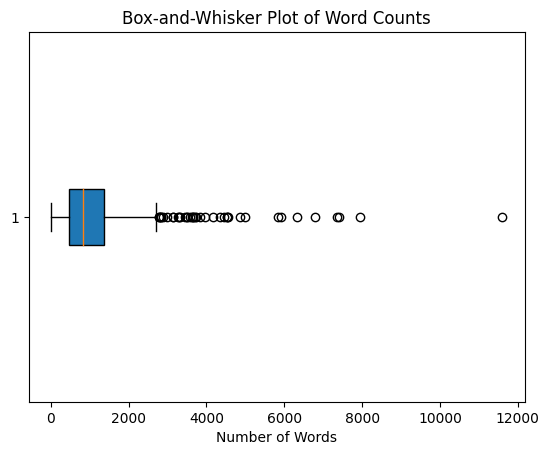

In [ ]:
import matplotlib.pyplot as plt

word_counts = [len(text.split()) for text in texts]

plt.boxplot(word_counts, vert=False, patch_artist=True, showfliers=True)
plt.title('Box-and-Whisker Plot of Word Counts')
plt.xlabel('Number of Words')
plt.show()


In [ ]:
from transformers import LongformerTokenizer

# Initialize the tokenizer
tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')

inputs = df['input']

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

In [ ]:
tokenized_inputs = [tokenizer.encode(text, add_special_tokens=True) for text in inputs]
token_lengths = [len(tokens) for tokens in tokenized_inputs]


Token indices sequence length is longer than the specified maximum sequence length for this model (6361 > 4096). Running this sequence through the model will result in indexing errors


In [ ]:
len(tokenized_inputs)

734

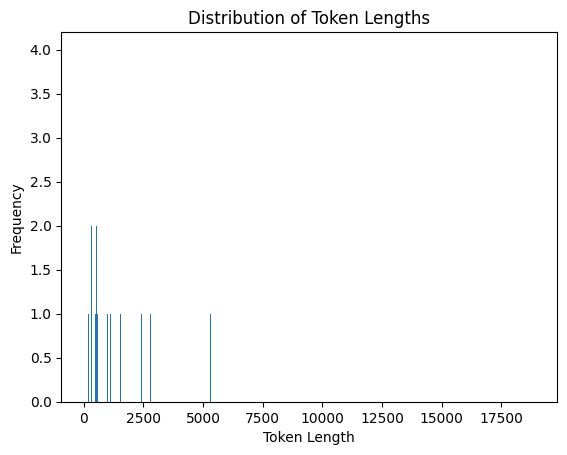

In [ ]:
import matplotlib.pyplot as plt

plt.hist(token_lengths, bins=range(min(token_lengths), max(token_lengths) + 1, 1))
plt.title('Distribution of Token Lengths')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# df = pd.read_csv("test_set_for_jesse.csv")

In [ ]:
print(df.isnull().sum())
print(df.dtypes)

input          37
output          0
case number     0
case_id         0
dtype: int64
input          object
output         object
case number    object
case_id         int64
dtype: object


In [ ]:
# Keep only rows where 'input' and 'output' are strings
df = df[df['input'].apply(lambda x: isinstance(x, str))]
df = df[df['output'].apply(lambda x: isinstance(x, str))]

In [ ]:
# Drop rows where either 'input' or 'output' is NaN
df = df.dropna(subset=['input', 'output'])

In [ ]:
print(df.isnull().sum())  # Check for remaining NaN values
print(df.dtypes)          # Check data types of the columns

input          0
output         0
case number    0
case_id        0
dtype: int64
input          object
output         object
case number    object
case_id         int64
dtype: object


In [ ]:
df['input_word_count'] = df['input'].apply(lambda x: len(x.split()))
df['output_word_count'] = df['output'].apply(lambda x: len(x.split()))


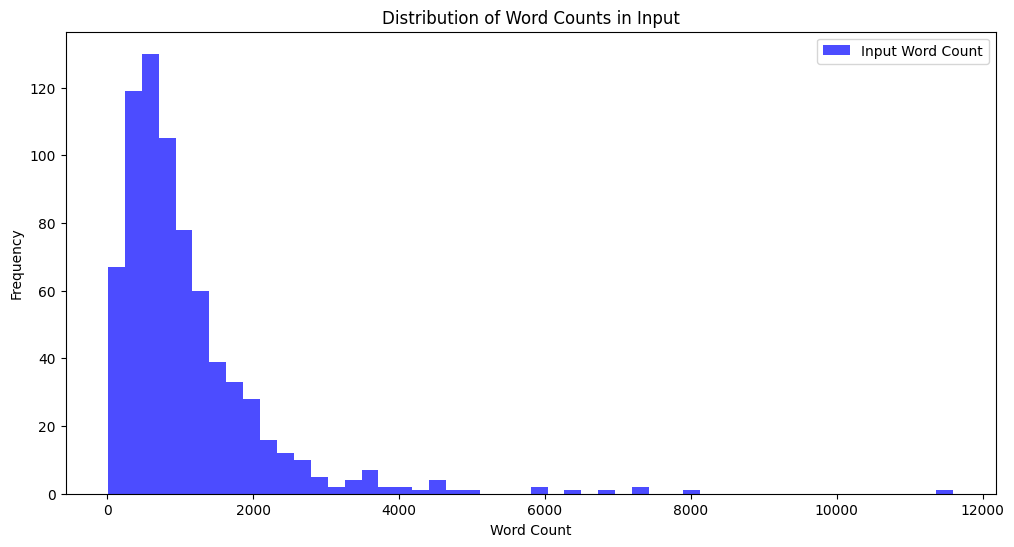

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(df['input_word_count'], bins=50, alpha=0.7, color='blue', label='Input Word Count')
plt.title('Distribution of Word Counts in Input')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()


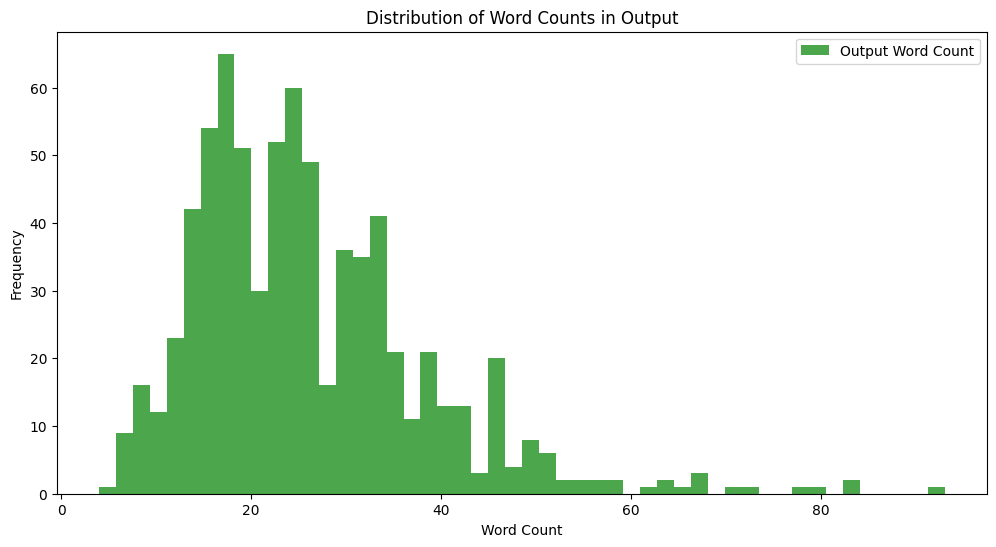

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(df['output_word_count'], bins=50, alpha=0.7, color='green', label='Output Word Count')
plt.title('Distribution of Word Counts in Output')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
df.to_csv('test_set_for_jesse_clean.csv', index=False)